# 模組 3.1: 缺失值概述與視覺化 (Missing Data Overview)

## 學習目標
- 理解缺失值在真實世界資料集中的普遍性。
- 學習缺失資料的三種主要類型 (MCAR, MAR, MNAR) 及其對分析的潛在影響。
- 掌握使用 `missingno` 套件來視覺化缺失值模式的方法。
- 了解並評估最簡單的缺失值處理策略：刪除法。

## 導論：為何要關注缺失值？

在您的指南《駕馭未知》中提到：「*誤解缺失數據：簡單地假設缺失是隨機發生的，而實際上可能是系統性缺失...直接刪除行或列可能引入偏見。*」

這點出了處理缺失值的核心挑戰：缺失本身可能就包含了重要的資訊。不恰當地處理缺失值，不僅會損失數據，更可能扭曲分析結果，導致模型產生偏誤。因此，在決定如何處理缺失值之前，第一步永遠是深入地 **理解** 它們的模式和可能的成因。

In [10]:
# 導入必要的函式庫
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


# 設定視覺化風格
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
print("Libraries and styles configured.")

# 忽略不必要的警告訊息
import warnings
warnings.filterwarnings('ignore')



Libraries and styles configured.


## 1. 載入資料並識別缺失值

我們將使用 House Prices 資料集，這是一個非常適合用來研究缺失值的真實案例。

| #／序號 | Column／欄位名稱                                    | Non-Null Count／非空值數量          | Dtype／資料型別        |
|:------:|:----------------------------------------------------|:-----------------------------------|:----------------------|
| 0      | Id<br>編號                                          | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 1      | MSSubClass<br>建築類別                              | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 2      | MSZoning<br>分區 (Zoning)                           | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 3      | LotFrontage<br>街區路段寬度                         | 1201 non-null<br>1201 非空值       | float64<br>浮點數     |
| 4      | LotArea<br>地段面積                                 | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 5      | Street<br>街道類型                                  | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 6      | Alley<br>巷道類型                                   | 91 non-null<br>91 非空值           | object<br>字串        |
| 7      | LotShape<br>地塊形狀                                | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 8      | LandContour<br>地形輪廓                             | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 9      | Utilities<br>公用設施                               | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 10     | LotConfig<br>地塊配置                               | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 11     | LandSlope<br>地面坡度                               | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 12     | Neighborhood<br>社區/街區                           | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 13     | Condition1<br>鄰近主要道路/鐵路                     | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 14     | Condition2<br>鄰近次要道路/鐵路                     | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 15     | BldgType<br>建築類型                                | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 16     | HouseStyle<br>房屋風格                              | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 17     | OverallQual<br>整體品質                            | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 18     | OverallCond<br>整體狀況                            | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 19     | YearBuilt<br>建造年份                              | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 20     | YearRemodAdd<br>重建/翻新年份                       | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 21     | RoofStyle<br>屋頂風格                               | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 22     | RoofMatl<br>屋頂材料                                | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 23     | Exterior1st<br>外牆第一層材料                       | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 24     | Exterior2nd<br>外牆第二層材料                       | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 25     | MasVnrType<br>砌體飾面類型                         | 588 non-null<br>588 非空值         | object<br>字串        |
| 26     | MasVnrArea<br>砌體飾面面積                         | 1452 non-null<br>1452 非空值       | float64<br>浮點數     |
| 27     | ExterQual<br>外牆品質                              | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 28     | ExterCond<br>外牆狀況                              | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 29     | Foundation<br>地基類型                             | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 30     | BsmtQual<br>地下室高度品質                         | 1423 non-null<br>1423 非空值       | object<br>字串        |
| 31     | BsmtCond<br>地下室狀況                             | 1423 non-null<br>1423 非空值       | object<br>字串        |
| 32     | BsmtExposure<br>地下室採光情況                     | 1422 non-null<br>1422 非空值       | object<br>字串        |
| 33     | BsmtFinType1<br>地下室裝修類型1                    | 1423 non-null<br>1423 非空值       | object<br>字串        |
| 34     | BsmtFinSF1<br>地下室裝修面積1                      | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 35     | BsmtFinType2<br>地下室裝修類型2                    | 1422 non-null<br>1422 非空值       | object<br>字串        |
| 36     | BsmtFinSF2<br>地下室裝修面積2                      | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 37     | BsmtUnfSF<br>地下室未裝修面積                      | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 38     | TotalBsmtSF<br>地下室總面積                        | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 39     | Heating<br>供暖種類                                | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 40     | HeatingQC<br>供暖品質                              | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 41     | CentralAir<br>中央冷氣                             | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 42     | Electrical<br>電氣系統                             | 1459 non-null<br>1459 非空值       | object<br>字串        |
| 43     | 1stFlrSF<br>一樓面積                               | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 44     | 2ndFlrSF<br>二樓面積                               | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 45     | LowQualFinSF<br>低品質裝修面積                     | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 46     | GrLivArea<br>地上居住面積                          | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 47     | BsmtFullBath<br>地下室完整衛浴數                   | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 48     | BsmtHalfBath<br>地下室半衛浴數                     | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 49     | FullBath<br>完整衛浴數                             | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 50     | HalfBath<br>半衛浴數                               | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 51     | BedroomAbvGr<br>地上臥室數                         | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 52     | KitchenAbvGr<br>地上廚房數                         | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 53     | KitchenQual<br>廚房品質                            | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 54     | TotRmsAbvGrd<br>地上總房間數 (不含衛浴)            | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 55     | Functional<br>功能性評分                           | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 56     | Fireplaces<br>壁爐數                               | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 57     | FireplaceQu<br>壁爐品質                            | 770 non-null<br>770 非空值         | object<br>字串        |
| 58     | GarageType<br>車庫類型                             | 1379 non-null<br>1379 非空值       | object<br>字串        |
| 59     | GarageYrBlt<br>車庫建造年份                        | 1379 non-null<br>1379 非空值       | float64<br>浮點數     |
| 60     | GarageFinish<br>車庫完工情況                       | 1379 non-null<br>1379 非空值       | object<br>字串        |
| 61     | GarageCars<br>車庫停車位數                         | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 62     | GarageArea<br>車庫面積                             | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 63     | GarageQual<br>車庫品質                             | 1379 non-null<br>1379 非空值       | object<br>字串        |
| 64     | GarageCond<br>車庫狀況                             | 1379 non-null<br>1379 非空值       | object<br>字串        |
| 65     | PavedDrive<br>鋪裝車道                            | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 66     | WoodDeckSF<br>木質甲板面積                         | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 67     | OpenPorchSF<br>開放式門廊面積                      | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 68     | EnclosedPorch<br>封閉式門廊面積                    | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 69     | 3SsnPorch<br>三季門廊面積                         | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 70     | ScreenPorch<br>有紗窗的門廊面積                    | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 71     | PoolArea<br>泳池面積                               | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 72     | PoolQC<br>泳池品質                                 | 7 non-null<br>7 非空值             | object<br>字串        |
| 73     | Fence<br>圍欄品質                                  | 281 non-null<br>281 非空值         | object<br>字串        |
| 74     | MiscFeature<br>其他特色                            | 54 non-null<br>54 非空值           | object<br>字串        |
| 75     | MiscVal<br>其他價值                                | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 76     | MoSold<br>銷售月份                                 | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 77     | YrSold<br>銷售年份                                 | 1460 non-null<br>1460 非空值       | int64<br>整數         |
| 78     | SaleType<br>銷售類型                               | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 79     | SaleCondition<br>銷售狀況                          | 1460 non-null<br>1460 非空值       | object<br>字串        |
| 80     | SalePrice<br>銷售價格                              | 1460 non-null<br>1460 非空值       | int64<br>整數         |


In [18]:
# 載入資料
path = r'..\..\..\..\datasets\raw\house_prices\train.csv'

df = pd.DataFrame()
try:
    df = pd.read_csv(path)
    print("成功載入 House Prices 資料集!")
    print(f"資料集維度: {df.shape}")
except FileNotFoundError:
    print(f"在 '{path}' 找不到 train.csv。")



成功載入 House Prices 資料集!
資料集維度: (1460, 81)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
# 快速計算每欄的缺失值數量與比例
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})

# 篩選出有缺失值的欄位並排序
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)
print("有缺失值的欄位統計:")
display(missing_info)


有缺失值的欄位統計:


,Missing Count,Missing Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


## 2. 視覺化缺失值模式

數字是抽象的，視覺化能幫助我們更直觀地理解缺失值在哪裡、有多少，以及它們之間是否存在關聯。`missingno` 是一個專為此目的設計的優秀函式庫。

### 2.1 缺失值矩陣 (`msno.matrix`)

`matrix` 圖可以讓我們一目了然地看到每筆資料的缺失情況。圖中的白色線條代表缺失值。

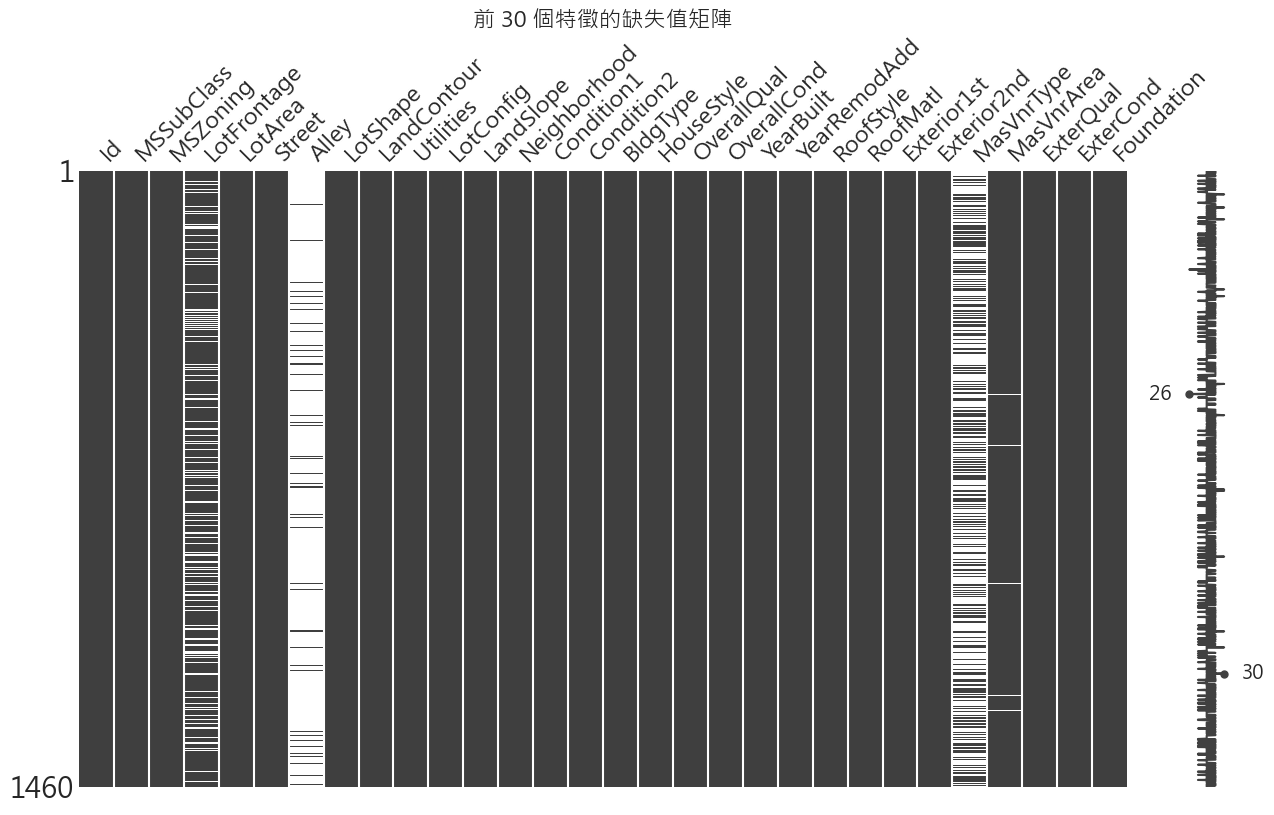

In [13]:
# 顯示前 100 筆資料的缺失值矩陣
msno.matrix(df.iloc[:, :30], figsize=(15, 8))
plt.title('前 30 個特徵的缺失值矩陣', fontsize=16)
plt.show()



**解讀**:
- 右側的 Sparkline (火花線) 總結了每行的完整度，最低點代表缺失最嚴重的行。
- 從矩陣中可以清楚地看到 `PoolQC`, `MiscFeature`, `Alley`, `Fence` 幾乎是全空的。`FireplaceQu` 也有大量的缺失。

### 2.2 缺失值關聯熱圖 (`msno.heatmap`)

熱圖展示了特徵之間的缺失相關性。數值接近 1 或 -1 都代表強烈的缺失相關性。
- **值為 1**: 如果一個特徵缺失，另一個特徵也 **極有可能** 缺失。
- **值為 -1**: 如果一個特徵缺失，另一個特徵則 **極有可能** 不缺失。
- **值為 0**: 特徵的缺失與否沒有關聯。

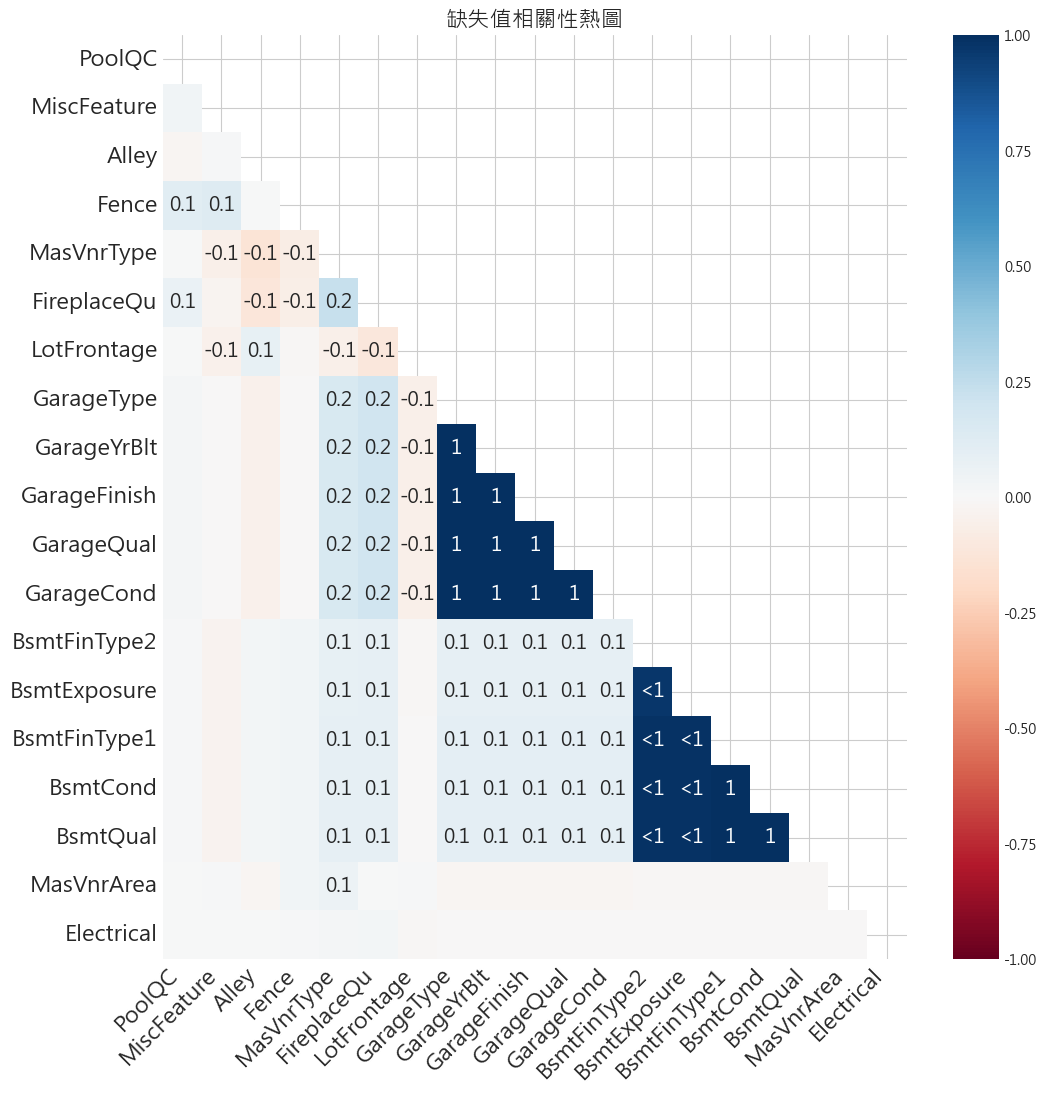

In [14]:
# 熱圖只會顯示至少有一個缺失值的欄位
msno.heatmap(df[missing_info.index], figsize=(12, 12))
plt.title('缺失值相關性熱圖', fontsize=16)
plt.show()



**解讀與假設**:
- `Garage` 相關的特徵 (如 `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, `GarageCond`) 之間存在非常高的正相關性。這非常符合邏輯：**如果一棟房子沒有車庫 (`GarageType` 缺失)，那麼所有關於車庫的描述性特徵也自然會是缺失的**。
- `MasVnrType` 和 `MasVnrArea` (砌體飾面類型和面積) 之間也存在強相關。

這種不是隨機的缺失模式，引導我們思考缺失值的類型。

## 3. 理解缺失值的類型

- **完全隨機缺失 (MCAR - Missing Completely at Random)**
  - **定義**: 數據的缺失與任何其他變數（包括自身）都無關。就像硬幣擲出反面就刪除一個數據點一樣，是純粹的隨機事件。
  - **例子**: 資料輸入員偶爾手滑漏掉了一個欄位。
  - **處理**: 刪除法是相對安全的，但仍會損失資訊。

- **隨機缺失 (MAR - Missing at Random)**
  - **定義**: 數據的缺失 **不依賴於該變數本身**，但與資料集中的 **其他觀測變數** 有關。
  - **例子**: 男性比女性更不願意填寫憂鬱症問卷。此時，「憂鬱症得分」的缺失與「性別」這個觀測變數有關，但與憂鬱症得分高低本身無關。
  - **處理**: 這是大多數進階插補方法（如 KNN、MICE）的前提假設。刪除法會引入偏見。

- **非隨機缺失 (MNAR - Missing Not at Random)**
  - **定義**: 數據的缺失與該變數的 **未觀測值本身** 有關。這是最棘手的情況。
  - **例子**: 高收入者比低收入者更不願意透露自己的薪資。此時，「薪資」的缺失與薪資的高低這個變數本身有關。
  - **我們的案例**: `GarageType` 的缺失，是因為房子本身就「沒有車庫」。`PoolQC` 的缺失，是因為「沒有泳池」。這種缺失具有明確的業務含義，它們 **不是未知，而是代表 "無"**。

### 對於 House Prices 資料集的判斷

很多欄位，如 `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `FireplaceQu`, `Garage...` 系列，都屬於 **非隨機缺失 (MNAR)**。它們的缺失代表了一種資訊，即「不存在該設施」。這為我們後續的特徵工程提供了明確的方向：我們不應該簡單地刪除或用平均值填充，而是應該用一個能代表「無」的值（如 0 或 "None"）來填充。

## 4. 簡單處理策略：刪除法

雖然我們判斷大部分缺失值都是有意義的，但我們先來了解最簡單的處理方法——刪除法，並評估其適用性。

- **整欄刪除**: 當一個欄位的缺失比例過高時（例如 > 50%），可以考慮直接刪除該欄位。
- **整行刪除**: 當缺失值是隨機分佈且資料量足夠大時，可以刪除含有缺失值的行。

In [15]:
# 假設我們決定刪除缺失率超過 80% 的欄位
cols_to_drop = missing_info[missing_info['Missing Percentage'] > 80].index
df_dropped_cols = df.drop(columns=cols_to_drop)

print(f"原始欄位數: {df.shape[1]}")
print(f"刪除缺失率 >80% 的欄位後，剩餘欄位數: {df_dropped_cols.shape[1]}")
print(f"被刪除的欄位: {list(cols_to_drop)}")




原始欄位數: 81
刪除缺失率 >80% 的欄位後，剩餘欄位數: 77
被刪除的欄位: ['PoolQC', 'MiscFeature', 'Alley', 'Fence']


In [16]:
# 對於 'Electrical' 只有一個缺失值，刪除該行是相對安全的
df_dropped_rows = df.dropna(subset=['Electrical'])
print(f"\n原始行數: {df.shape[0]}")
print(f"刪除 'Electrical' 缺失行後，剩餘行數: {df_dropped_rows.shape[0]}")




原始行數: 1460
刪除 'Electrical' 缺失行後，剩餘行數: 1459


## 總結

在這個筆記本中，我們建立了處理缺失值的思維框架：
- 處理缺失值的第一步是 **理解而非動手**。
- 使用 `missingno` 套件可以高效地視覺化缺失模式和關聯性。
- 根據視覺化和業務邏輯判斷缺失值的類型（MCAR, MAR, MNAR）至關重要。
- 對於 House Prices 資料集，我們發現大量缺失值是 **非隨機缺失(MNAR)**，它們本身就是一種特徵。
- 刪除法雖然簡單，但會損失資訊，甚至引入偏見，必須謹慎使用。

在下一個筆記本中，我們將學習比刪除法更精細的策略——**插補法**。